In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils import resample

%matplotlib inline

In [3]:
sms = pd.read_csv('sms_spam.csv')
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.shape

(5574, 2)

In [14]:
# encoding labels
le = LabelEncoder()
sms['label'] = le.fit_transform(sms.type)
sms.head()

,type,text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


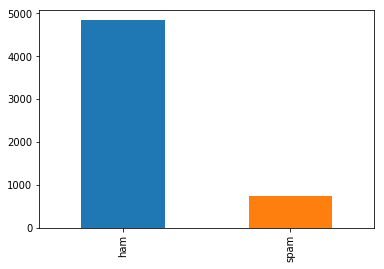

In [15]:
# checking distribution of data
sms.type.value_counts().plot.bar()

In [16]:
# resolving class imbalance by resampling minority class
spam_df = sms[sms.type == 'spam']
ham_df = sms[sms.type == 'ham']

print(f'Spam:{spam_df.shape}\nHam:{ham_df.shape}')

Spam:(747, 3)
Ham:(4827, 3)


In [17]:
spam_df_upsampled = resample(spam_df, replace=True, n_samples=len(ham_df), random_state=123)
spam_df_upsampled.shape

(4827, 3)

In [20]:
sms_balanced = pd.concat([ham_df, spam_df_upsampled]).sort_index()
sms_balanced.head()

,type,text,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [24]:
sms_balanced.shape

(9654, 3)

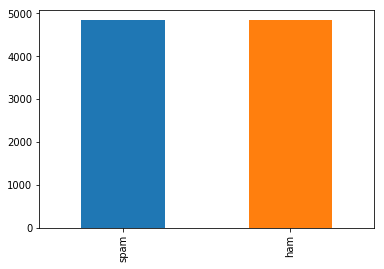

In [19]:
# re-checking distribution of data
sms_balanced.type.value_counts().plot.bar()

In [23]:
# converting text data to tf-idf sparse matrix
tfidf = TfidfVectorizer()
sms_balanced_tfidf = tfidf.fit_transform(sms_balanced.text)
sms_balanced_tfidf.shape

(9654, 8713)

In [25]:
# preparing data for modelling
X = sms_balanced_tfidf
y = sms_balanced.label
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
# modelling
clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.5)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=300, random_state=None)

In [27]:
# predict
y_pred = clf.predict(X_test)

In [29]:
# score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.995857497928749


In [30]:
clf_report = classification_report(y_test, y_pred)
print(clf_report)

             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1238
          1       0.99      1.00      1.00      1176

avg / total       1.00      1.00      1.00      2414

